# quickstart with transients


The `Transient` object has a **rate**, a **template** and a **model**.

- The **rate** informs on how many we expect to have in nature for a redshift range. *This is a float*

- The **model** specifies how the template parameters are drawn. *This is a dict.*

and optionally:
- The **template** provides the spectro-photometric time serie of the transient given input parameters. *The is a sncosmo.Model*

The first two enables you to draw a sample of transients as given by nature. This last one is needed only if you want to get the transient lightcurves (so when you create a dataset when combining transient with a survey). 

## SNeIa Example

In [1]:
from skysurvey import target

The **SNeIa** Transient is already defined and ready to use. 

In [4]:
snia = target.SNeIa()

You can then draw as many SNeIa as you want. The parameters will be drawn following the transient's model (see below).
These are SNeIa as given by nature following this model.

In [6]:
%%time
data = snia.draw(size=10000)

CPU times: user 103 ms, sys: 4.13 ms, total: 107 ms
Wall time: 106 ms


In [7]:
data # another copy is stored as snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec
0,0.1415,-0.096,-0.039,59255.094953,-19.435586,19.763381,0.000197,183.147252,-28.834651
1,0.1355,0.531,0.071,59255.094953,-19.176866,19.919844,0.000171,187.902196,19.683835
2,0.1905,0.879,0.011,59255.094953,-19.414586,20.494312,0.000101,147.527537,53.607326
3,0.1735,-0.750,0.039,59255.094953,-19.098326,20.585800,0.000093,125.366304,45.891122
4,0.1585,0.013,0.018,59255.094953,-19.271296,20.196819,0.000132,193.071191,-9.358510
...,...,...,...,...,...,...,...,...,...
9995,0.1825,1.681,-0.044,59255.094953,-19.700116,20.105428,0.000144,195.241763,62.936479
9996,0.0785,-0.401,0.085,59255.094953,-19.002286,18.827883,0.000467,32.181298,-0.706600
9997,0.1455,0.316,-0.055,59255.094953,-19.543666,19.721244,0.000205,22.688827,2.666206
9998,0.1165,0.195,-0.016,59255.094953,-19.403876,19.338431,0.000292,173.375862,39.842611


In [8]:
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec
0,0.1415,-0.096,-0.039,59255.094953,-19.435586,19.763381,0.000197,183.147252,-28.834651
1,0.1355,0.531,0.071,59255.094953,-19.176866,19.919844,0.000171,187.902196,19.683835
2,0.1905,0.879,0.011,59255.094953,-19.414586,20.494312,0.000101,147.527537,53.607326
3,0.1735,-0.750,0.039,59255.094953,-19.098326,20.585800,0.000093,125.366304,45.891122
4,0.1585,0.013,0.018,59255.094953,-19.271296,20.196819,0.000132,193.071191,-9.358510
...,...,...,...,...,...,...,...,...,...
9995,0.1825,1.681,-0.044,59255.094953,-19.700116,20.105428,0.000144,195.241763,62.936479
9996,0.0785,-0.401,0.085,59255.094953,-19.002286,18.827883,0.000467,32.181298,-0.706600
9997,0.1455,0.316,-0.055,59255.094953,-19.543666,19.721244,0.000205,22.688827,2.666206
9998,0.1165,0.195,-0.016,59255.094953,-19.403876,19.338431,0.000292,173.375862,39.842611


**Tip**: You can  directly use the ``from_draw()`` classmethod to load a transient instance already drawn.

In [9]:
%%time
snia = target.SNeIa.from_draw(10000)

CPU times: user 95 ms, sys: 4.16 ms, total: 99.2 ms
Wall time: 99.6 ms


In [10]:
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec
0,0.1385,0.281,0.064,59174.916025,-19.214813,19.933544,0.000169,241.497675,13.432507
1,0.1085,0.540,-0.013,59174.916025,-19.493623,19.082900,0.000370,243.894815,21.795798
2,0.1795,-1.244,0.080,59174.916025,-18.950913,20.814788,0.000075,319.784230,-8.529972
3,0.1795,-0.545,0.042,59174.916025,-19.168473,20.597228,0.000092,50.508613,-25.470084
4,0.1015,-0.826,0.125,59174.916025,-18.867683,19.554026,0.000239,103.421639,-27.139519
...,...,...,...,...,...,...,...,...,...
9995,0.1925,0.588,-0.031,59174.916025,-19.557043,20.377064,0.000112,4.165953,22.386873
9996,0.1595,-0.284,-0.037,59174.916025,-19.453863,20.029232,0.000155,44.413758,16.632149
9997,0.1275,0.303,-0.004,59174.916025,-19.432093,19.521468,0.000247,145.143476,74.820858
9998,0.0705,1.340,0.179,59174.916025,-19.000823,18.584008,0.000585,56.348310,-22.747536


## Model

The ``data`` (list of transients) are generated following the **model**, stored as ``self.model``.

In [17]:
snia.model

{'redshift': {'param': {'zmax': 0.2, 'model': None}, 'as': 'z'},
 'x1': {'model': 'nicolas2021'},
 'c': {'model': 'intrinsic_and_dust'},
 't0': {'model': 'uniform',
  'param': {'mjd_range': [59000, 60460], 'model': 'uniform'}},
 'magabs': {'model': 'tripp1998', 'input': ['x1', 'c']},
 'magobs': {'model': 'magabs_to_magobs', 'input': ['z', 'magabs']},
 'x0': {'model': 'magobs_to_x0', 'input': ['magobs']},
 'radec': {'model': 'random',
  'param': {'ra_range': [0, 360], 'dec_range': [-30, 90], 'model': 'random'},
  'as': ['ra', 'dec']}}

**tip**: the transient model is display (better formated) when you print the object

In [19]:
snia

{'redshift': {'param': {'zmax': 0.2, 'model': None}, 'as': 'z'},
 'x1': {'model': 'nicolas2021'},
 'c': {'model': 'intrinsic_and_dust'},
 't0': {'model': 'uniform',
        'param': {'mjd_range': [59000, 60460], 'model': 'uniform'}},
 'magabs': {'model': 'tripp1998', 'input': ['x1', 'c']},
 'magobs': {'model': 'magabs_to_magobs', 'input': ['z', 'magabs']},
 'x0': {'model': 'magobs_to_x0', 'input': ['magobs']},
 'radec': {'model': 'random',
           'param': {'ra_range': [0, 360],
                     'dec_range': [-30, 90],
                     'model': 'random'},
           'as': ['ra', 'dec']}}

#### How does **model** works


To generate ``data``, the code reads **model** line-by-line and follows the instructions it contains. 

In this SNeIa example, **model** contains 8 entries. So the generated ``data`` will contains at least 8 columns (see the *as* option).

A **model** entry accepts 4 keywords:
  1. *model*: (name of) the function used to draw the sample, e.g. np.random.uniform ;
  2. *param*: options that enter the function as kwargs ;
  3. *as*: (list of) name(s) of the column on the resulting ``data`` ;
  4. *input*: list of already drawn entry used as argument for the *model* function (see e.g. ``magobs``)

#### the *input* option making **model**  a "DAG"
The *input* option enables you to generate self-consistent parameters. 

For instance, the absolute magnitude of a SNeIa depends on its stretch and color (following the ``alpha*x_1 - beta*c `` Tripp's relation). Hence, once the ``x_1``and ``c`` (independent) variables have been drawn, the SNeIa absolute magnitude (``magabs``) can be obtained using as input the already drawn ``x_1`` and ``c`` parameters. Same goes for the observed magnitude, it only dependents on the absolute magnitude ``magabs`` and the redshift ``z``. 

The (potentially complex) connections between the variables enabled by the *input* corresponds to the creation a [Directed acyclic graph](https://en.wikipedia.org/wiki/Directed_acyclic_graph).
You can complexify as you which your **model** creating as many variables and intermediate variables as you want.

#### Build a model

See the "Build a new model" tutorial to learn more about Transient's modelling


## Plotting

Show a given lightcurve in any band known by sncosmo, for instance here that on the snia index 9 ``snia.data.loc[9]``

### Lightcurve 

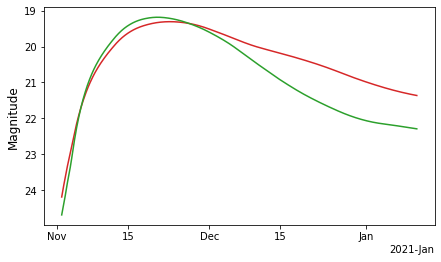

In [20]:
band = ["ztfr","ztfg"]
fig = snia.show_lightcurve(band, index=9, in_mag=True)

### Parameters (visualize the relation created by self.model)

You can also show the scatter between any parameters. The parameter correlations have handle by your `model`

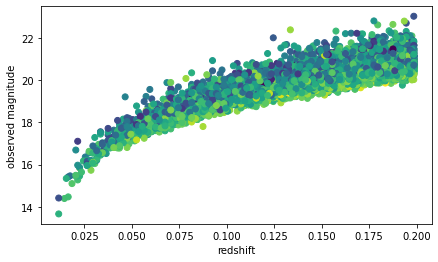

In [21]:
fig = snia.show_scatter("z", "magobs", ckey="x1") 
ax = fig.axes[0]

_ = ax.set_ylabel("observed magnitude")
_ = ax.set_xlabel("redshift")

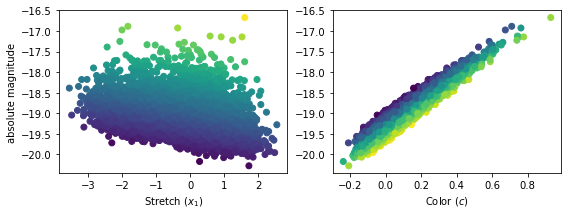

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[9,3])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

_ = snia.show_scatter("x1", "magabs", ckey="c", ax=ax1) 
_ = snia.show_scatter("c", "magabs", ckey="x1", ax=ax2) 

_ = ax1.set_ylabel("absolute magnitude")
_ = ax1.set_xlabel(fr"Stretch ($x_1$)")
_ = ax2.set_xlabel(fr"Color ($c$)")

## Getter

You have several pre-defined method to access parameters or the template directly

### template parameters

the `get_template_parameters` method enbales you to get the subpart of ``data`` that corresponds to actual template (sncosmo.Model) parameters

In [28]:
snia.get_template_parameters()

,z,x1,c,t0,x0
0,0.1385,0.281,0.064,59174.916025,0.000169
1,0.1085,0.540,-0.013,59174.916025,0.000370
2,0.1795,-1.244,0.080,59174.916025,0.000075
3,0.1795,-0.545,0.042,59174.916025,0.000092
4,0.1015,-0.826,0.125,59174.916025,0.000239
...,...,...,...,...,...
9995,0.1925,0.588,-0.031,59174.916025,0.000112
9996,0.1595,-0.284,-0.037,59174.916025,0.000155
9997,0.1275,0.303,-0.004,59174.916025,0.000247
9998,0.0705,1.340,0.179,59174.916025,0.000585


You can also request to only have the template parameter for a given target
(similar to as `snia.get_template_parameters().loc[index]`)

In [29]:
snia.get_template_parameters(index=9)

z         0.123500
x1        0.136000
c        -0.073000
t0    59174.916025
x0        0.000316
Name: 9, dtype: float64

### Template (sncosmo.Model)

You can get a template (sncosmo.Model) either with default values

In [30]:
template = snia.get_template() # default

In [31]:
template

In [32]:
template.parameters

array([0. , 0. , 1. , 0. , 0. , 0. , 3.1])

or with parameter set to that of a target 

In [34]:
template_target9 = snia.get_template(index=9) 
template_target9.parameters

array([ 1.23500000e-01,  5.91749160e+04,  3.16034433e-04,  1.36000000e-01,
       -7.30000000e-02,  0.00000000e+00,  3.10000000e+00])

or affecting parameters

In [36]:
template_target9 = snia.get_template(index=9, x1=-5) 
template_target9.parameters

array([ 1.23500000e-01,  5.91749160e+04,  3.16034433e-04, -5.00000000e+00,
       -7.30000000e-02,  0.00000000e+00,  3.10000000e+00])